# **<파이썬 머신러닝 완벽 가이드 실습>**

## 프로젝트 요약
- 한줄 요약: 노가다  
- try 1 -> colab 기존 코드 따라감
  - 이번 데이터는 피처가 너무 많아서, 데이터 전처리 및 피처 엔지니어링은 나의 모자른 도메인 지식으로는 할 엄두가 안났음
  - 그래서 데이터를 먼저 살펴보고, 회귀모델의 성능을 높이는 방법을 구글링 했더니, 회귀모델 성능을 높이기 위해서는, 다중공선성을 띄는 피처들을 제거 (VIF 값이 10보다 큰거)하는 방법과, 스케일러(Standard 및 Robust)를 적용하라고 했음
- try 2 -> VIF > 10인 피처 제거 + Robust Scaling 적용
- try 3 -> VIF > 10인 피처 제거 + Standard Scaling 적용
  - try 2, try3 올렸더니 너무 결과가 별로였음
- try 4 -> 결측치 다 제거
  - 결측치 개수가 600 몇 ~ 24 모두 제거
  - 4가지 모델(XGBoost, GBM, Light GBM, 랜덤포레스트)의 하이퍼파라미터를 적용X/적용O 일때의 RMSE 평가지표값을 GPT에게 물어봐서 '적용X 일때의 RMSE 지표값이 ~ 인데, 하이퍼파라미터 2가지만 추가해서 RMSE 값을 낮춰줄 수 있어?' (나의 노트북은 그리드 서치가 잘 돌아가지 않기 때문)
  - 혼합 모델은 별로였음 -> 혼합 모델의
  - 스태킹 모델의 성능이 좋았음
  - test.csv 또한 train 데이터 전처리 + 결측치 제거 방법 + 똑같이 스태킹 적용
  - 점수가 좋아졌음

## 캐글 자전거 대여 수요 예측 실습
- 교재 375-396p

### 1) 데이터 살펴보기

- 예측하려고 하는 target값은 'SalePrice' 이다.

- 판매 가격 - 부동산의 판매 가격(달러). 예측하려는 대상
- MSSubClass: 건물 클래스
- MSZoning: 일반 구역 분류
- LotFrontage: 부지에 연결된 거리의 선형 피트
- LotArea: 부지 크기(제곱 피트)
- Street: 도로 접근 유형
- Alley: 골목 접근 유형
- LotShape: 부지의 일반적인 모양
- LandContour: 부지의 평탄도
- Utilities: 이용 가능한 유틸리티 유형
- LotConfig: 부지 구성
- LandSlope: 부지의 경사
- Neighborhood: Ames 시 경계 내의 물리적 위치
- Condition1: 주요 도로 또는 철도와의 근접성
- Condition2: 주요 도로 또는 철도와의 근접성(두 번째 도로가 있는 경우)
- BldgType: 주거 유형
- HouseStyle: 주거 스타일
- OverallQual: 전반적인 재료 및 마감 품질
- OverallCond: 전반적인 상태 평가
- YearBuilt: 원래 건축 날짜
- YearRemodAdd: 리모델링 날짜
- RoofStyle: 지붕 유형
- RoofMatl: 지붕 재료
- Exterior1st: 주택의 외부 덮개
- Exterior2nd: 주택의 외부 덮개(재료가 두 개 이상인 경우)
- MasVnrType: 석조 베니어 유형
- MasVnrArea: 석조 베니어 면적(제곱 피트)
- ExterQual: 외부 재료 품질
- ExterCond: 외부 재료의 현재 상태
- Foundation: 기초 유형
- BsmtQual: 지하실 높이
- BsmtCond: 지하실의 일반적인 상태
- BsmtExposure: 워크아웃 또는 정원 수준의 지하실 벽
- BsmtFinType1: 지하실 마감 영역의 품질
- BsmtFinSF1: 유형 1 마감 제곱 피트
- BsmtFinType2: 두 번째 마감 영역의 품질(있는 경우)
- BsmtFinSF2: 유형 2 마감 제곱 피트
- BsmtUnfSF: 지하실 영역의 미완성 제곱 피트
- TotalBsmtSF: 지하실 영역의 총 제곱 피트
- Heating: 난방 유형
- HeatingQC: 난방 품질 및 상태
- CentralAir: 중앙 에어컨
- Electrical: 전기 시스템
- 1stFlrSF: 1층 제곱 피트
- 2ndFlrSF: 2층 제곱 피트
- LowQualFinSF: 낮은 품질의 마감 제곱 피트(모든 층)
- GrLivArea: 지상 (지상) 거실 면적 평방 피트
- BsmtFullBath: 지하 전체 욕실
- BsmtHalfBath: 지하 반 욕실
- FullBath: 지상 위에 있는 전체 욕실
- HalfBath: 지상 위에 있는 반 욕실
- Bedroom: 지하 수준 위에 있는 침실 수
- Kitchen: 주방 수
- KitchenQual: 주방 품질
- TotRmsAbvGrd: 지상 위의 총 방 수(욕실 제외)
- Functional: 주택 기능 평가
- Fireplaces: 벽난로 수
- FireplaceQu: 벽난로 품질
- GarageType: 차고 위치
- GarageYrBlt: 차고가 건축된 연도
- GarageFinish: 차고의 내부 마감
- GarageCars: 차량 수용 인원 기준 차고 크기
- GarageArea: 차고 크기(제곱피트)
- GarageQual: 차고 품질
- GarageCond: 차고 상태
- PavedDrive: 포장된 차도
- WoodDeckSF: 목재 데크 면적(제곱피트)
- OpenPorchSF: 열린 현관 면적(제곱피트)
- EnclosedPorch: 닫힌 현관 면적(제곱피트)
- 3SsnPorch: 3시즌 현관 면적(제곱피트)
- ScreenPorch: 스크린 현관 면적(제곱피트)
- PoolArea: 수영장 면적(제곱피트)
- PoolQC: 수영장 품질
- Fence: 울타리 품질
- MiscFeature: 다른 카테고리에 포함되지 않은 기타 기능
- MiscVal: 기타 기능의 $Value
- MoSold: 판매된 월
- YrSold: 판매 연도
- SaleType: 판매 유형
- SaleCondition: 판매 조건

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('/content/train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [ ]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1168, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtExposure      24
BsmtFinType2      24
BsmtQual          23
BsmtCond          23
BsmtFinType1      23
MasVnrArea         8
Electrical         1
dtype: int64


- 데이터 세트는 1460개의 행과 81개의 피처로 구성되어 있다.
- 80개의 피처 중에서 43개가 문자형(object)이고, 나머지가 숫자형 데이터이다.
- 널값이 많은 피처들도 있다.
  - 전체 1480개 데이터 중, PoolQC, MiscFeature, Alley, Fence는 1000개가 넘는 데이터가 널값이다.

- 일단, 회귀모델을 적용하기 전에 target값의 분포가 정규분포 형태인지 확인한다.

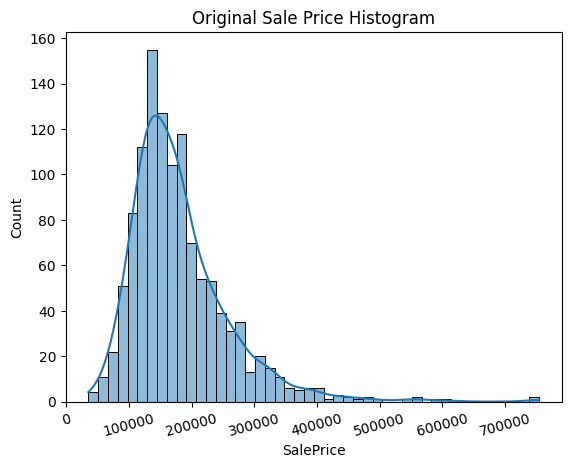

In [ ]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(house_df['SalePrice'], kde=True)

plt.show()

- 위 그래프를 보면, target값인 SalePrice의 값은 정규분포에서 약간 벗어난 형태이다. -> 로그변환이 필요하다.

### 2) 데이터 전처리하기

#### 1) SalePrice 컬럼에 로그변환하기

- SalePrice 컬럼에 로그변환을 적용하여 정규분포 형태를 띄게 한다.
  - log1p()를 이용하여 로그변환한 결과값을 학습을 하고, 예측할때는 다시 결과값을 expm1()으로 원복해야됨!
- 일단, SalePrice 컬럼을 로그변환하여 분포를 본다.

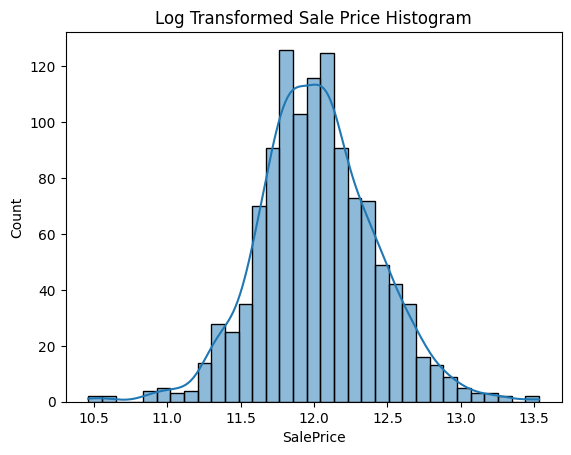

In [ ]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)

plt.show()

- 위 그래프를 보면, 이제 SalePrice 컬럼이 정규분포 형태를 띄게 되었다.
- 이제, SalePrice를 로그변환하여 DataFrame에 반영한다.

#### 2) 널값 처리하기

- 또한, 널값이 많은 피처인 PoolQC, MiscFeature, Alley, Fence, FireplaceQu는 삭제하고, Id도 단순 식별자이므로 관련이 없으므로 삭제한다.
- LotFrontage는 널값이 259개로 비교적 많으나, 이것을 평균값으로 대체한다.
- 나머지 널값 피처는 널값이 많지 않으므로, 숫자형 데이터의 경우 평균값으로 대체한다.

In [ ]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])


# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType'], axis=1 , inplace=True)
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
# house_df.fillna(house_df.mean(),inplace=True)
num_cols = house_df.select_dtypes(include=['number']).columns
house_df[num_cols] = house_df[num_cols].fillna(house_df[num_cols].mean())


# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
dtype: object


#### 3) 문자형 피처 원-핫 인코딩

- 이제 문자형 피처를 제외하고는 널값이 없으므로, 문자형 피처는 모두 원-핫 인코딩으로 변환한다.

In [ ]:
house_df.shape

(1168, 67)

In [ ]:
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))


Null 컬럼과 그 건수:
  BsmtExposure    24
BsmtFinType2    24
BsmtFinType1    23
Electrical       1
dtype: int64


In [ ]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1168, 67)
get_dummies() 수행 후 데이터 Shape: (1168, 237)
## Null 피처의 Type :
 Series([], dtype: object)


- 원-핫 인코딩 후, 피처가 75개 -> 267개로 증가했다.
- 그리고, 널값을 가진 피처는 이제 존재하지 않는다.

### 3) 선형회귀 모델 학습 -> 예측 -> 모델 평가

- target값인 SalePrice가 로그변환 되었으므로, 예측값 역시 로그변환된 SalePrice 값을 기반으로 예측하므로, 원본 SalePrice 예측값의 로그변환 값임 -> 실제값도 로그변환됐고, 예측값도 이를 반영한 로그변환 값이므로 예측 결과 오류에 RMSE만 적용하면 RMSLE가 자동으로 측정된다.

#### 1) RMSE 계산 함수 만들기

- get_rmse(): 단일 모델의 RMSE 값 출력
- get_rmses(): get_rmse()를 이용하여 여러 모델의 RMSE값 반환

In [ ]:
# RMSE 계산 함수 만들기
def get_rmse(model):
    pred = model.predict(X_test)
    pred_exp = np.expm1(pred)
    mse = mean_squared_error(np.expm1(y_test) , pred_exp)
    mse2 = mean_squared_error(y_test , pred)
    rmse0 = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(np.sqrt(mse2), 3)))
    print('{0} 로그 변환된 MSE: {1}'.format(model.__class__.__name__,np.round(mse2, 3)))

    print('{0} 로그 변환 해제 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse0, 3)))
    print('{0} 로그 변환 해제 MSE: {1}'.format(model.__class__.__name__,np.round(mse, 3)))

    return rmse0

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

#### 2) 모델 학습 -> 예측 -> 평가

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# 학습/테스트 데이터 분리하기
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)


# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression() # 선형회귀
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge() # 릿지회귀
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso() # 라쏘회귀
lasso_reg.fit(X_train, y_train)


models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.124
LinearRegression 로그 변환된 MSE: 0.015
LinearRegression 로그 변환 해제 RMSE: 21751.709
LinearRegression 로그 변환 해제 MSE: 473136857.633
Ridge 로그 변환된 RMSE: 0.127
Ridge 로그 변환된 MSE: 0.016
Ridge 로그 변환 해제 RMSE: 22541.367
Ridge 로그 변환 해제 MSE: 508113240.972
Lasso 로그 변환된 RMSE: 0.177
Lasso 로그 변환된 MSE: 0.031
Lasso 로그 변환 해제 RMSE: 33922.992
Lasso 로그 변환 해제 MSE: 1150769364.675


[np.float64(21751.70930371663),
 np.float64(22541.3673270359),
 np.float64(33922.991682265914)]

- 위의 결과, 라쏘회귀의 경우 나머지 2가지 회귀 방식보다 많이 성능이 떨어지는 결과가 나왔다. -> 라쏘회귀는 최적의 하이퍼파라미터 튜닝이 필요해 보임!

##### cf) 중간정리
- **<과정>**
- SalePrice 컬럼 로그변환
- 널값 처리
  - 널값 많은 컬럼:PoolQC, MiscFeature, Alley, Fence, FireplaceQu 삭제
  - 널값 안 많은 컬럼: 숫자형 데이터의 경우 평균값으로 대체
- 인코딩: 문자형 피처 '원-핫 인코딩' 진행
- **<결과>**
- LinearRegression 로그 변환 해제 RMSE: 21295.906 -> 선형회귀 RMSE
- Ridge 로그 변환 해제 RMSE: 22584.92 -> 릿지회귀 RMSE
- Lasso 로그 변환 해제 RMSE: 33922.99 -> 라쏘회귀 RMSE

#### 3) 피처별 회귀계수 시각화하기

- 일단, 피처별 회귀계수를 시각화하여 모델별로 어떤 피처의 회귀계수로 구성되는지 확인한다.
  - 회귀계수 값의 상위 10개, 하위 10개의 피처 확인해보기

In [ ]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_, index=X_features.columns)

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

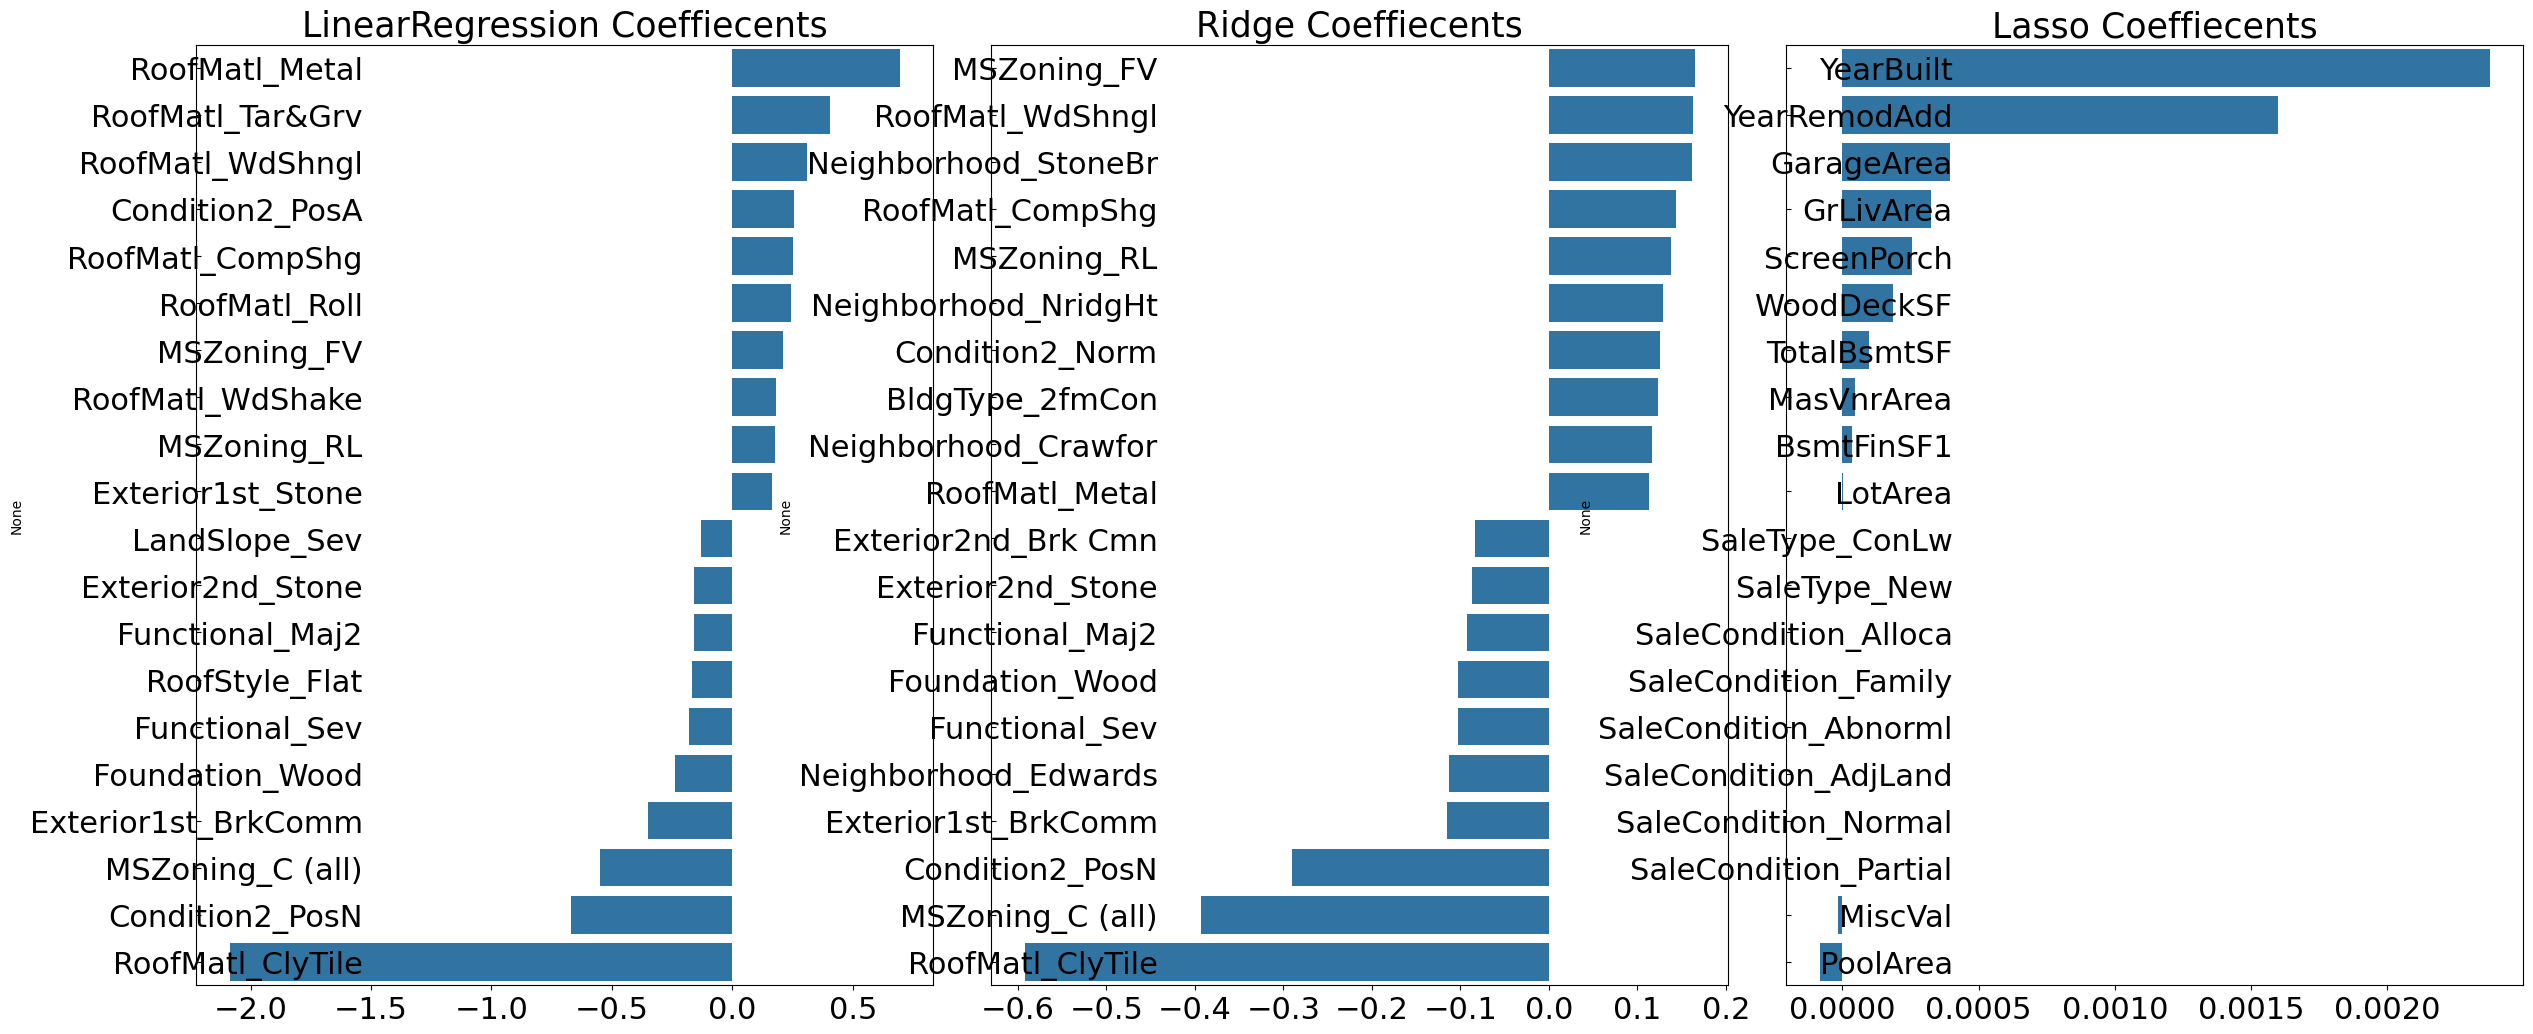

In [ ]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])


# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- 위 그래프를 보면, 선형회귀와 릿지회귀의 경우, 회귀계수가 유사한 형태로 분포되어 있다.
- 하지만, 라쏘회귀는 전체적으로 회귀계수의 값이 매우 작고, YearBuilt 컬럼의 회귀계수가 가장 크고, 다른 피처의 회귀계수는 매우 작다.
- 어쨌든, 라쏘회귀의 경우 나머지 2개의 모델과 다른 회귀계수 형태를 띄고있다.

#### 4) 학습/테스트 데이터 세트의 평균 RMSE 측정해보기

- 혹시 학습 데이터의 분할에 문제가 있어서 그런 것인지, 이번에는 학습/테스트 데이터 세트를 train_test_split()으로 분할하지 않고, 전체 데이터 세트인 X_features와 y_target을 5개의 교차검증 폴드 세트로 분할해서 평균 RMSE를 측정해본다 (cross_val_score() 사용).

In [ ]:
from sklearn.model_selection import cross_val_score


def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.242 0.192 0.107 0.126 0.115]
LinearRegression CV 평균 RMSE 값: 0.156

Ridge CV RMSE 값 리스트: [0.212 0.169 0.118 0.126 0.119]
Ridge CV 평균 RMSE 값: 0.149

Lasso CV RMSE 값 리스트: [0.287 0.212 0.173 0.185 0.17 ]
Lasso CV 평균 RMSE 값: 0.205


- 5개의 폴드 세트로 모델을 학습하고 평가해도, 여전히 라쏘회귀는 릿지회귀보다 모델의 성능이 안좋다.
- 릿지회귀와 라쏘회귀 모델에 대해서 alpha 하이퍼파라미터를 변화시키면서 최적의 값을 도출해본다.

- 앞으로, 모델별로 최적의 하이퍼파라미터 찾는 작업을 반복해서 진행할 예정이라, 이를 위한 별도의 함수를 생성한다.  
  - print_best_params(model, params): 모델과 하이퍼파라미터 딕셔너리 객체를 받아서, 최적화 작업의 결과를 표시하는 함수 -> 이 함수를 이용해, 릿지회귀와 라쏘회귀 모델의 최적화 alpha값을 추출한다.

In [ ]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params,
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1496, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1513, 최적 alpha:{'alpha': 0.001}


- 위의 결과로, 릿지회귀 모델의 경우에는 alpha값이 12에서 최적 평균 RMSE가 0.418이고, 라쏘회귀 모델의 경우에는 alpha가 0.001에서 최적 평균 RMSE가 0.142이다.
- 라쏘회귀 모델의 경우, alpha값 최적화 이후에 모델의 예측 성능이 많이 좋아졌다.

#### 5) 선형회귀에 최적의 alpha값을 설정하여 모델 학습 -> 예측 -> 평가

- 이제, 선형회귀 모델에 최적의 alpha값을 설정하고, train_test_split()으로 분할된 학습/테스트 데이터를 이용하여, 모델 학습 -> 예측 -> 평가를  진행하고, 모델별 회귀계수를 시각화 해본다.

LinearRegression 로그 변환된 RMSE: 0.124
LinearRegression 로그 변환된 MSE: 0.015
LinearRegression 로그 변환 해제 RMSE: 21751.709
LinearRegression 로그 변환 해제 MSE: 473136857.633
Ridge 로그 변환된 RMSE: 0.126
Ridge 로그 변환된 MSE: 0.016
Ridge 로그 변환 해제 RMSE: 23120.679
Ridge 로그 변환 해제 MSE: 534565774.464
Lasso 로그 변환된 RMSE: 0.121
Lasso 로그 변환된 MSE: 0.015
Lasso 로그 변환 해제 RMSE: 22935.21
Lasso 로그 변환 해제 MSE: 526023854.264


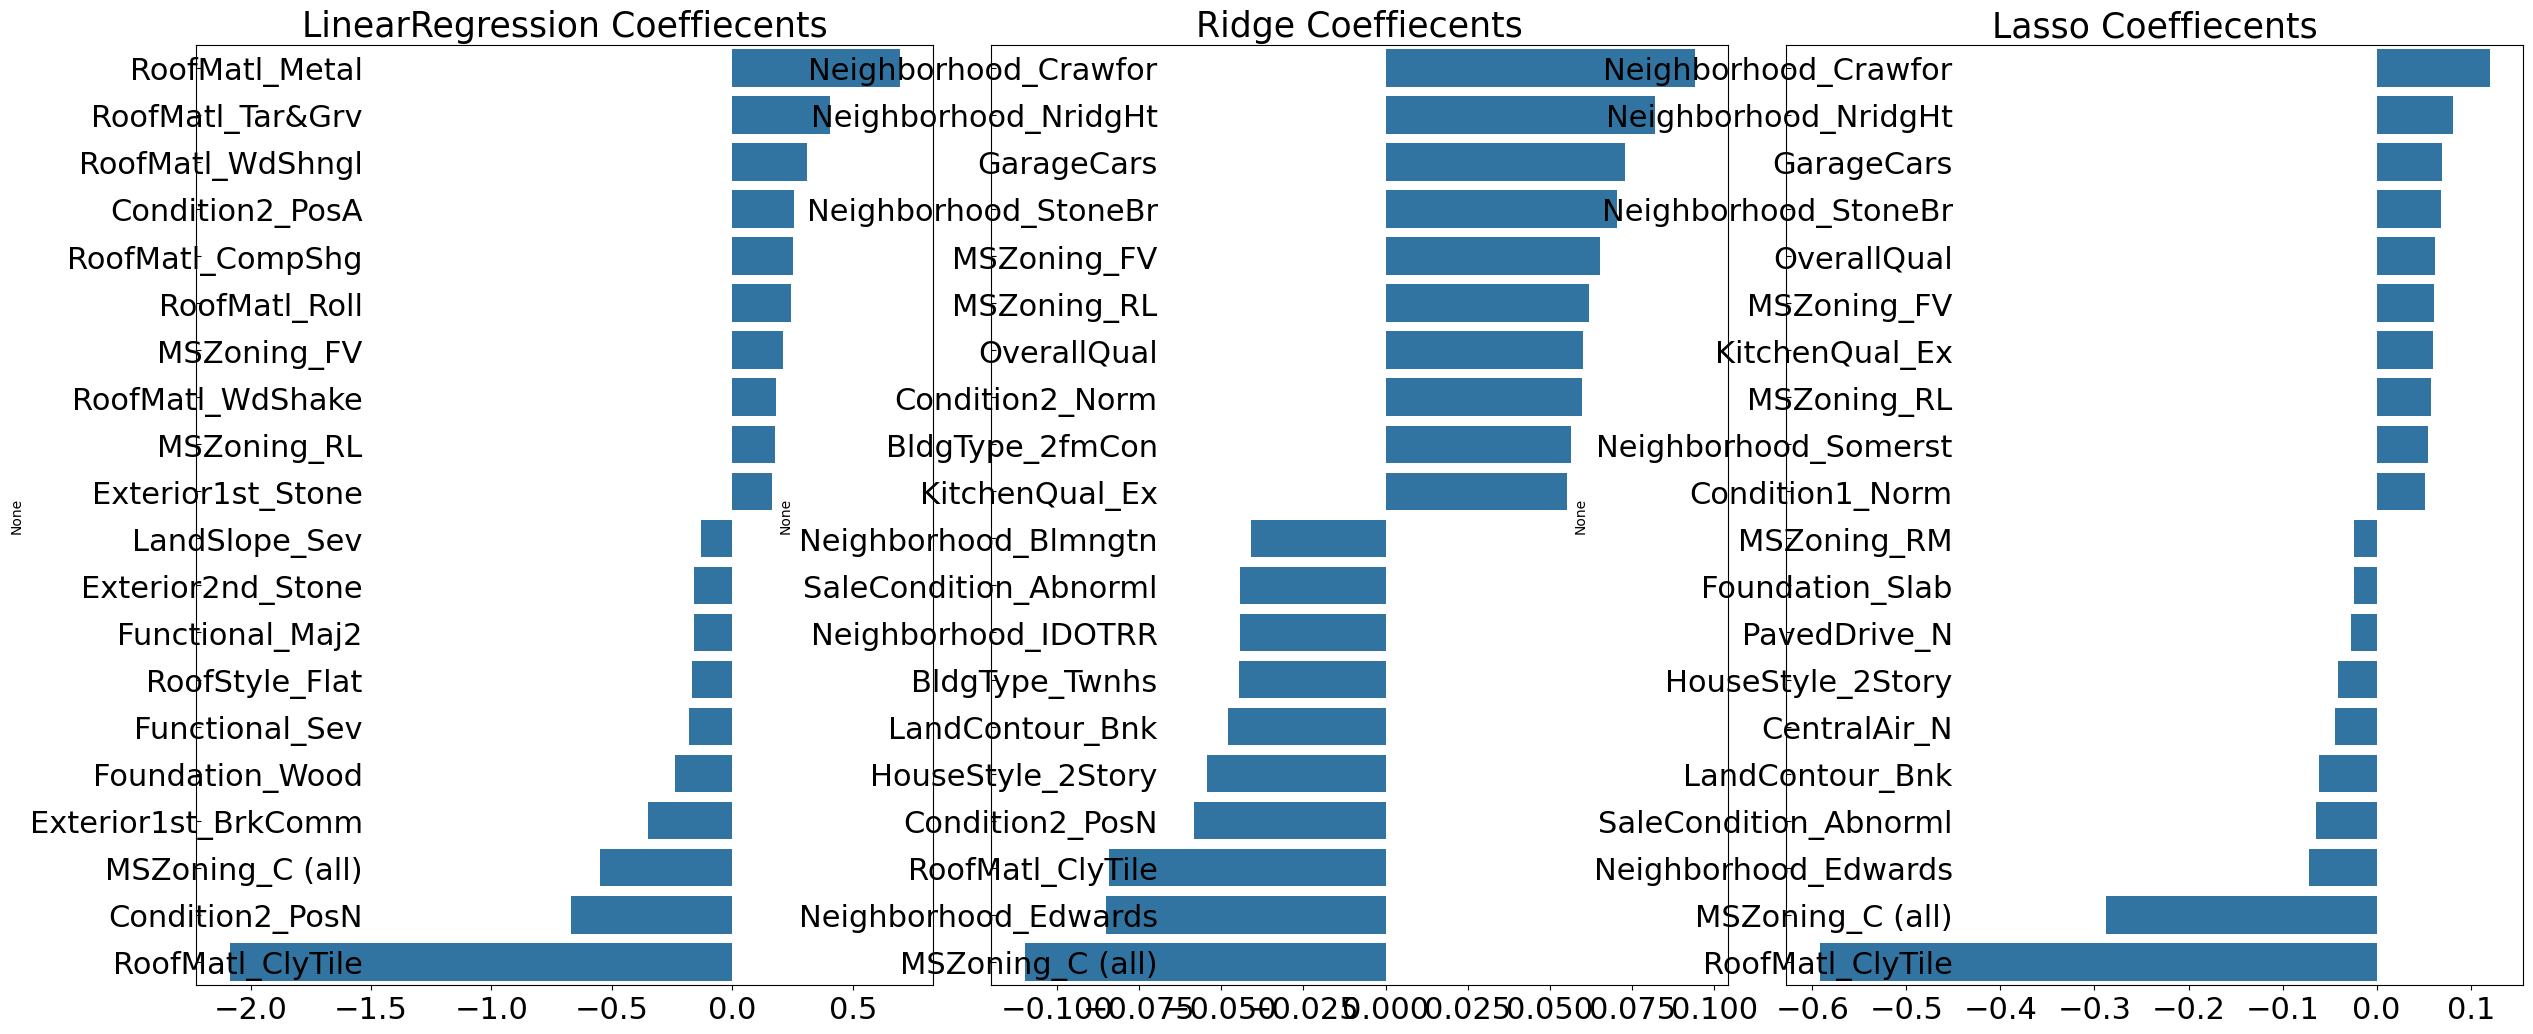

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

##### cf) 중간정리
- **<과정>**
- SalePrice 컬럼 로그변환
- 널값 처리
  - 널값 많은 컬럼:PoolQC, MiscFeature, Alley, Fence, FireplaceQu 삭제
  - 널값 안 많은 컬럼: 숫자형 데이터의 경우 평균값으로 대체
- 인코딩: 문자형 피처 '원-핫 인코딩' 진행
- **<결과>**
- LinearRegression 로그 변환 해제 RMSE: 21295.906 -> 선형회귀 RMSE
- Ridge 로그 변환 해제 RMSE: 22584.92 -> 릿지회귀 RMSE
- Lasso 로그 변환 해제 RMSE: 33922.99 -> 라쏘회귀 RMSE
---------------------------------------------------------------
- **<과정 추가>**
- 최적의 하이퍼파라미터 설정
  - 릿지회귀 alpha값:12
  - 라쏘회귀 alpha값: 0.001
- **<결과>**
- LinearRegression 로그 변환 해제 RMSE: 21295.906 -> 선형회귀 RMSE
- Ridge 로그 변환 해제 RMSE: 23159.75 -> 릿지회귀 RMSE
- Lasso 로그 변환 해제 RMSE: 23121.426 -> 라쏘회귀 RMSE

- 위 그래프를 보면, alpha값을 최적화 후, 테스트 데이터 세트의 예측 성능이 좋아졌음을 알 수 있다.
- 또한, 모델별 회귀계수도 많이 달라졌다.
  - 기존에는 라쏘회귀 모델의 회귀계수가 나머지 2개 모델과 많은 차이가 있었는데, alpha값을 최적화 했을때 릿지회귀, 라쏘회귀 모델에서 비슷한 피처의 회귀계수가 높아졌다.
  - 그러나, 라쏘회귀 모델의 경우에는 릿지회귀 모델에 비해 동일한 피처라도 회귀계수의 값이 매우 작다.

### 4) 데이터 세트를 추가 가공하여 모델 튜닝 진행하기

#### 1) 피처 데이터 세트의 왜곡 정도 확인하기

- 피처 데이터 세트의 경우에도, 지나치게 왜곡된 피처가 존재할 경우에 회귀모델의 예측 성능을 저하시킬 수 있음 -> 모든 숫자형 피처의 데이터 분포도를 확인하여, 분포가 어느 정도로 왜곡됐는지 알아본다.
- 주의) skew()를 적용하는 숫자형 피처에서, 원-핫 인코딩된 카테고릴 숫자형 피처는 제외한다!
  - 카테고리형 피처는 코드성 피처(?) 이므로, 인코딩 할때 왜곡될 가능성이 높다.
  - 따라서, skew() 함수를 적용하는 DataFrame의 경우, 원-핫 인코딩이 적용된 house_df_ohe가 아니라, 원-핫 인코딩이 적용되지 않은 house_df이어야 한다.

In [ ]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_df.dtypes[house_df.dtypes != 'object'].index
# house_df에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_df[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          22.099034
PoolArea         14.377604
LotArea          11.097791
3SsnPorch        11.040646
LowQualFinSF      9.608861
BsmtFinSF2        4.507199
KitchenAbvGr      4.488325
BsmtHalfBath      4.133732
ScreenPorch       3.976766
EnclosedPorch     3.093917
LotFrontage       2.760540
OpenPorchSF       2.454159
MasVnrArea        2.418589
BsmtFinSF1        1.881057
TotalBsmtSF       1.864686
WoodDeckSF        1.546567
1stFlrSF          1.488257
GrLivArea         1.474257
MSSubClass        1.391605
dtype: float64


- 이제, 위의 결과에서 왜곡된 정도가 높은 피처를 로그변환한다.

In [ ]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

- 로그변환 후, 이 피처들의 왜곡 정도를 확인해도 여전히 높은 왜곡 정도를 가진 피처가 있지만, 더이상 로그변환을 하더라도 개선하기 어려워서 그냥 유지한다.
- house_df의 피처의 일부분을 로그변환 했으므로, 이제 다시 원-핫 인코딩을 적용한 house_df_ohe를 만든다.
- 그리고 이에 기반한 피처 데이터 세트, 학습/테스트 데이터 세트를 모두 다시 만든다.
- 이후, 이렇게 만든 데이터 세트에 다시 앞에서 생성한 print_best_params() 함수를 이용해 최적의 alpha값과 RMSE값을 출력해본다.

In [ ]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)


# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1317, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.129, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.115
LinearRegression 로그 변환된 MSE: 0.013
LinearRegression 로그 변환 해제 RMSE: 19910.157
LinearRegression 로그 변환 해제 MSE: 396414350.885
Ridge 로그 변환된 RMSE: 0.114
Ridge 로그 변환된 MSE: 0.013
Ridge 로그 변환 해제 RMSE: 21019.826
Ridge 로그 변환 해제 MSE: 441833074.143
Lasso 로그 변환된 RMSE: 0.111
Lasso 로그 변환된 MSE: 0.012
Lasso 로그 변환 해제 RMSE: 22020.921
Lasso 로그 변환 해제 MSE: 484920949.744


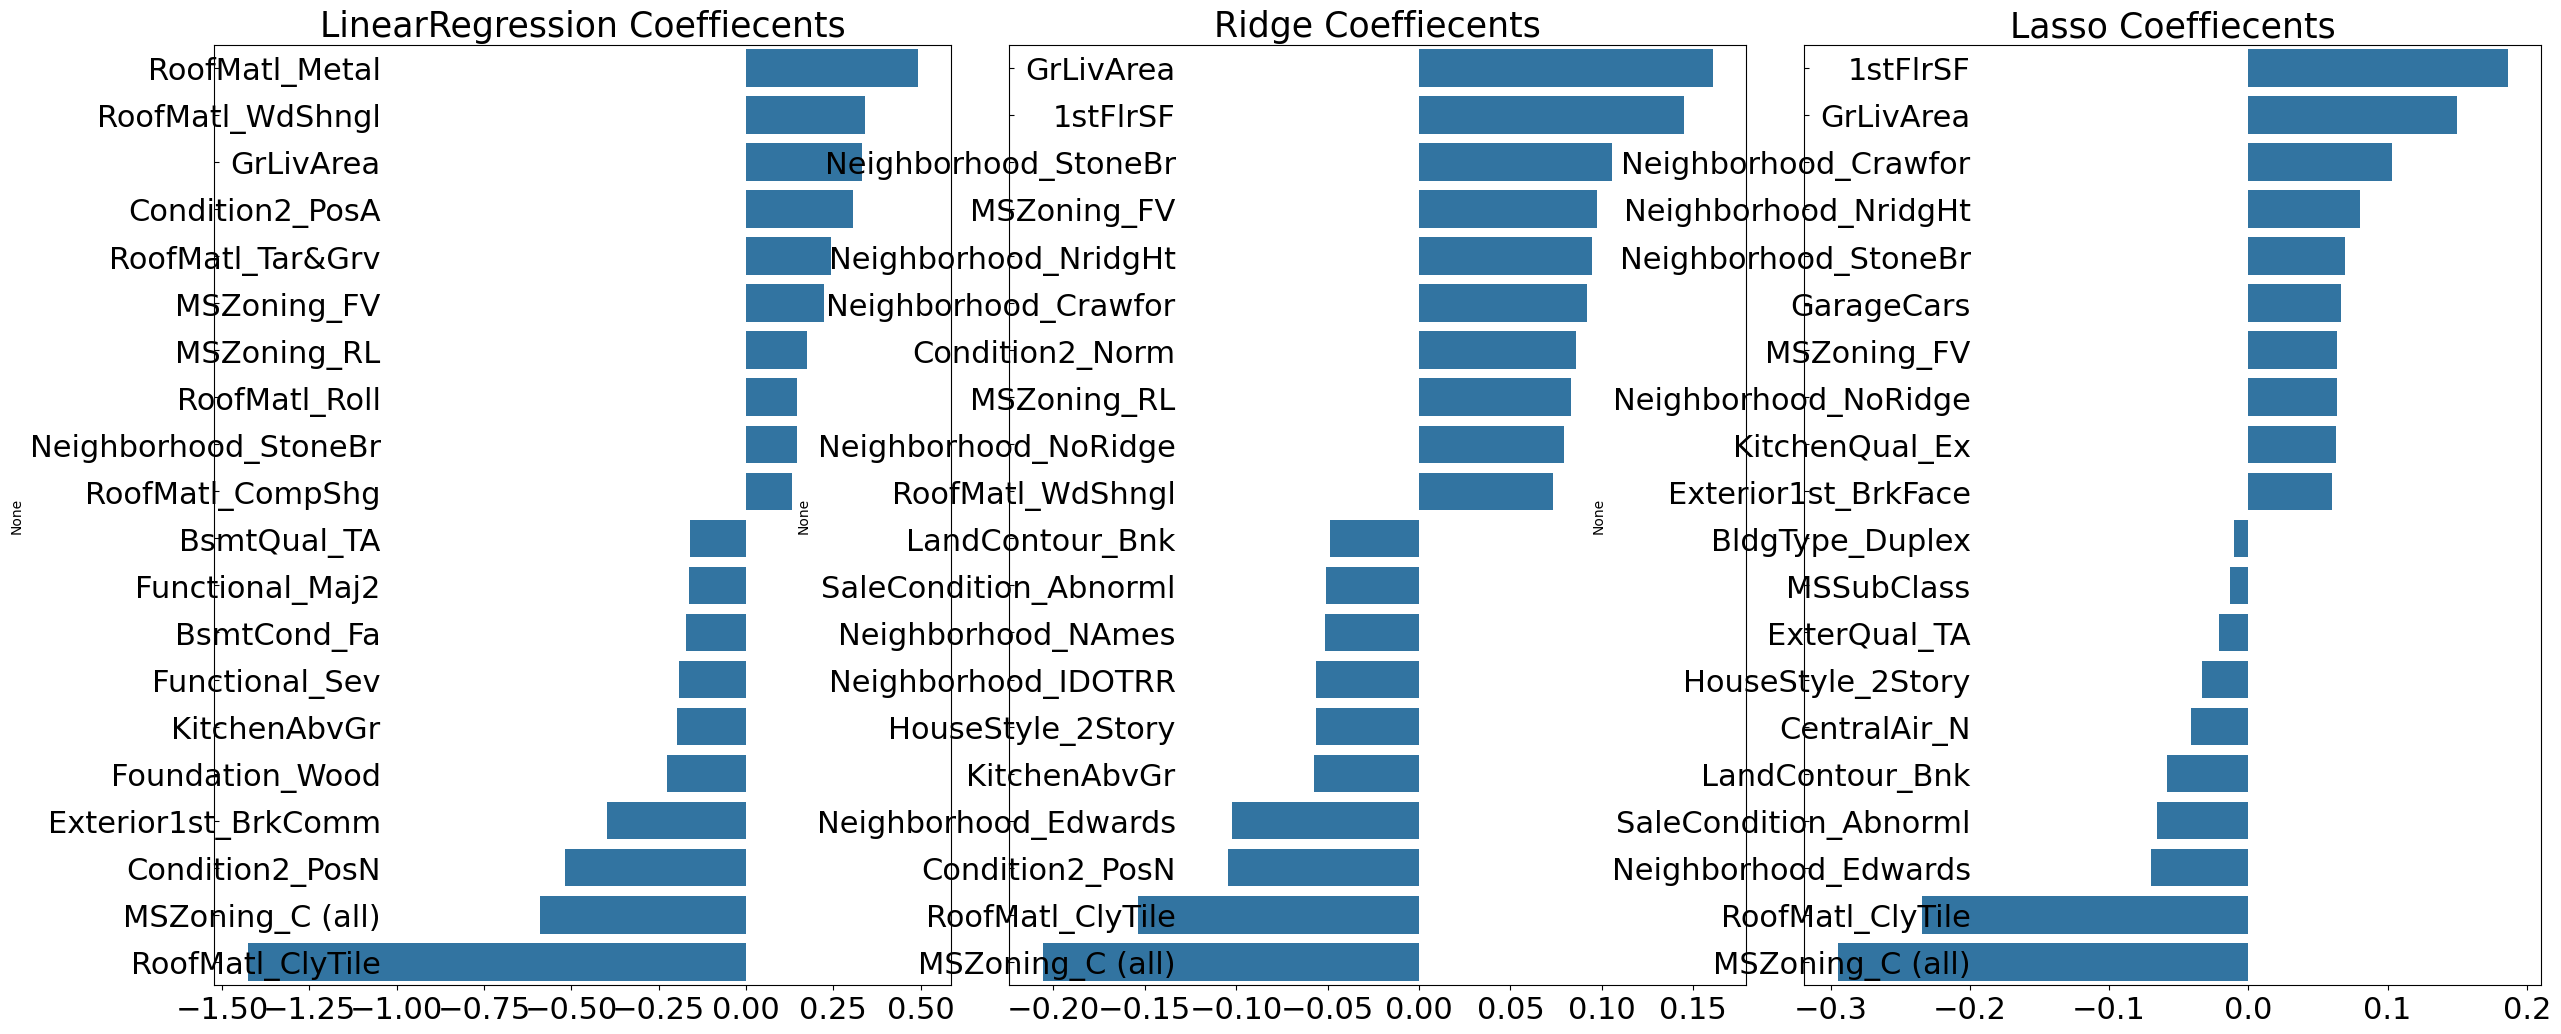

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- 위의 결과, 릿지회귀 모델의 경우 최적의 alpha값이 12 -> 10 으로 변경됐고, 릿지회귀와 라쏘회귀 모델 모두 피처의 로그변환 이전과 비교했을때, 릿지회귀는 0.1418 -> 0.1275, 라쏘회귀는 0.142 -> 0.1252로, 5개의 폴드 교차검증의 평균 RMSE값이 향상됐다 (값이 더 작아졌으므로).
- 회귀계수를 시각화 한 결과를 보면, 3개 모델 모두 GrLivArea 즉, 주거공간 크기가 회귀계수가 가장 높은 피처가 되었음 -> 주거공간 크기가 주택 가격에 미치는 영향이 당연히 제일 높을 것이라는 상식선에서의 결과가 이제 도출됐다.

##### cf) 중간정리
- **<과정>**
- SalePrice 컬럼 로그변환
- 널값 처리
  - 널값 많은 컬럼:PoolQC, MiscFeature, Alley, Fence, FireplaceQu 삭제
  - 널값 안 많은 컬럼: 숫자형 데이터의 경우 평균값으로 대체
- 인코딩: 문자형 피처 '원-핫 인코딩' 진행
- **<결과>**
- LinearRegression 로그 변환 해제 RMSE: 21295.906 -> 선형회귀 RMSE
- Ridge 로그 변환 해제 RMSE: 22584.92 -> 릿지회귀 RMSE
- Lasso 로그 변환 해제 RMSE: 33922.99 -> 라쏘회귀 RMSE
---------------------------------------------------------------
- **<과정 추가>**
- 최적의 하이퍼파라미터 설정
  - 릿지회귀 alpha값: 12
  - 라쏘회귀 alpha값: 0.001
- **<결과>**
- LinearRegression 로그 변환 해제 RMSE: 21295.906 -> 선형회귀 RMSE
- Ridge 로그 변환 해제 RMSE: 23159.75 -> 릿지회귀 RMSE
- Lasso 로그 변환 해제 RMSE: 23121.426 -> 라쏘회귀 RMSE
---------------------------------------------------------------
- **<과정 추가>**
- 왜곡된 정도가 높은 피처를 로그변환
- 위 내용에 기반한 피처 데이터 세트, 학습/테스트 데이터 세트를 모두 다시 만든 후에 찾은 최적의 하이퍼파라미터 설정
  - 릿지회귀 alpha값: 8
  - 라쏘회귀 alpha값: 0.001
- **<결과>**
- LinearRegression 로그 변환 해제 RMSE: 20177.977 -> 선형회귀 RMSE
- Ridge 로그 변환 해제 RMSE: 21542.856 -> 릿지회귀 RMSE
- Lasso 로그 변환 해제 RMSE: 22157.381 -> 라쏘회귀 RMSE

#### 2) 회귀계수가 높은 피처의 이상치 데이터 처리하기

- 회귀계수가 높은 피처, 즉 예측에 많은 영향을 미치는 중요한 피처의 이상치 데이터의 처리해본다.
- 먼저 3개 모델 모두에서 가장 큰 회귀계수를 가지는 GrLivArea 피처의 데이터 분포를 살펴본다.

- 주택 가격 데이터가 변환되기 이전의 원본 데이터 세트인 house_df_org에서 GrLivArea와 target값인 SalePrice의 관계를 시각화 해본다.

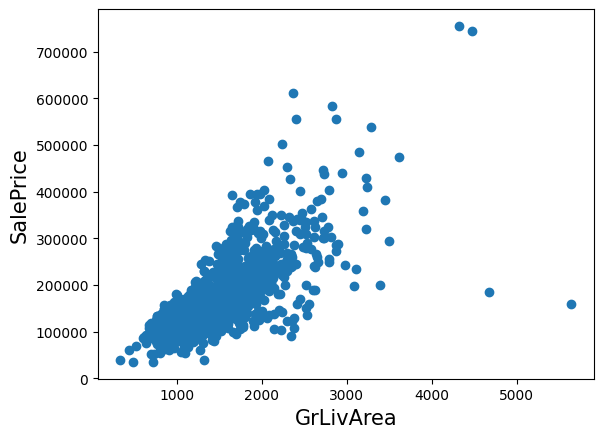

In [ ]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

- 위 그래프의 결과, GrLivArea값이 4000, 5000쪽에 있지만 SalePrice가 낮은 2개의 이상치 데이터를 삭제한다.

In [ ]:
# GrLivArea와 SalePrice 모두 로그 변환되었으므로 이를 반영한 조건 생성.
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index


print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)

# DataFrame의 index를 이용하여 아웃라이어 레코드 삭제.
house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 64 373]
아웃라이어 삭제 전 house_df_ohe shape: (1168, 245)
아웃라이어 삭제 후 house_df_ohe shape: (1166, 245)


- 이상치 삭제 후, 1460 -> 1458로 데이터가 줄었으므로, 맞게 삭제되었다.
- 이제, 업데이트된 house_df_ohe를 기반으로 피처 데이터 세트와 target 데이터 세트를 다시 생성하고, 앞에서 정의한 print_best_params() 함수를 이용하여 릿지회귀와 라쏘회귀 모델의 최적화를 수행하고, 결과를 출력한다.

In [ ]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1143, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1126, 최적 alpha:{'alpha': 0.001}


- 위의 결과, 단 2개의 이상치 데이터만 제거했지만, 모델의 예측 수치가 매우 크게 향상됐다.
- 그리고, 릿지회귀 모델의 최적 alpha 값은 12 -> 8로 변했고, 평균 RMSE가 0.1275 -> 0.1149로 개선됐고, 라쏘회귀 모델의 최적 alpha 값은

LinearRegression 로그 변환된 RMSE: 0.122
LinearRegression 로그 변환된 MSE: 0.015
LinearRegression 로그 변환 해제 RMSE: 21336.901
LinearRegression 로그 변환 해제 MSE: 455263345.495
Ridge 로그 변환된 RMSE: 0.116
Ridge 로그 변환된 MSE: 0.014
Ridge 로그 변환 해제 RMSE: 21152.993
Ridge 로그 변환 해제 MSE: 447449122.753
Lasso 로그 변환된 RMSE: 0.111
Lasso 로그 변환된 MSE: 0.012
Lasso 로그 변환 해제 RMSE: 20322.878
Lasso 로그 변환 해제 MSE: 413019373.062


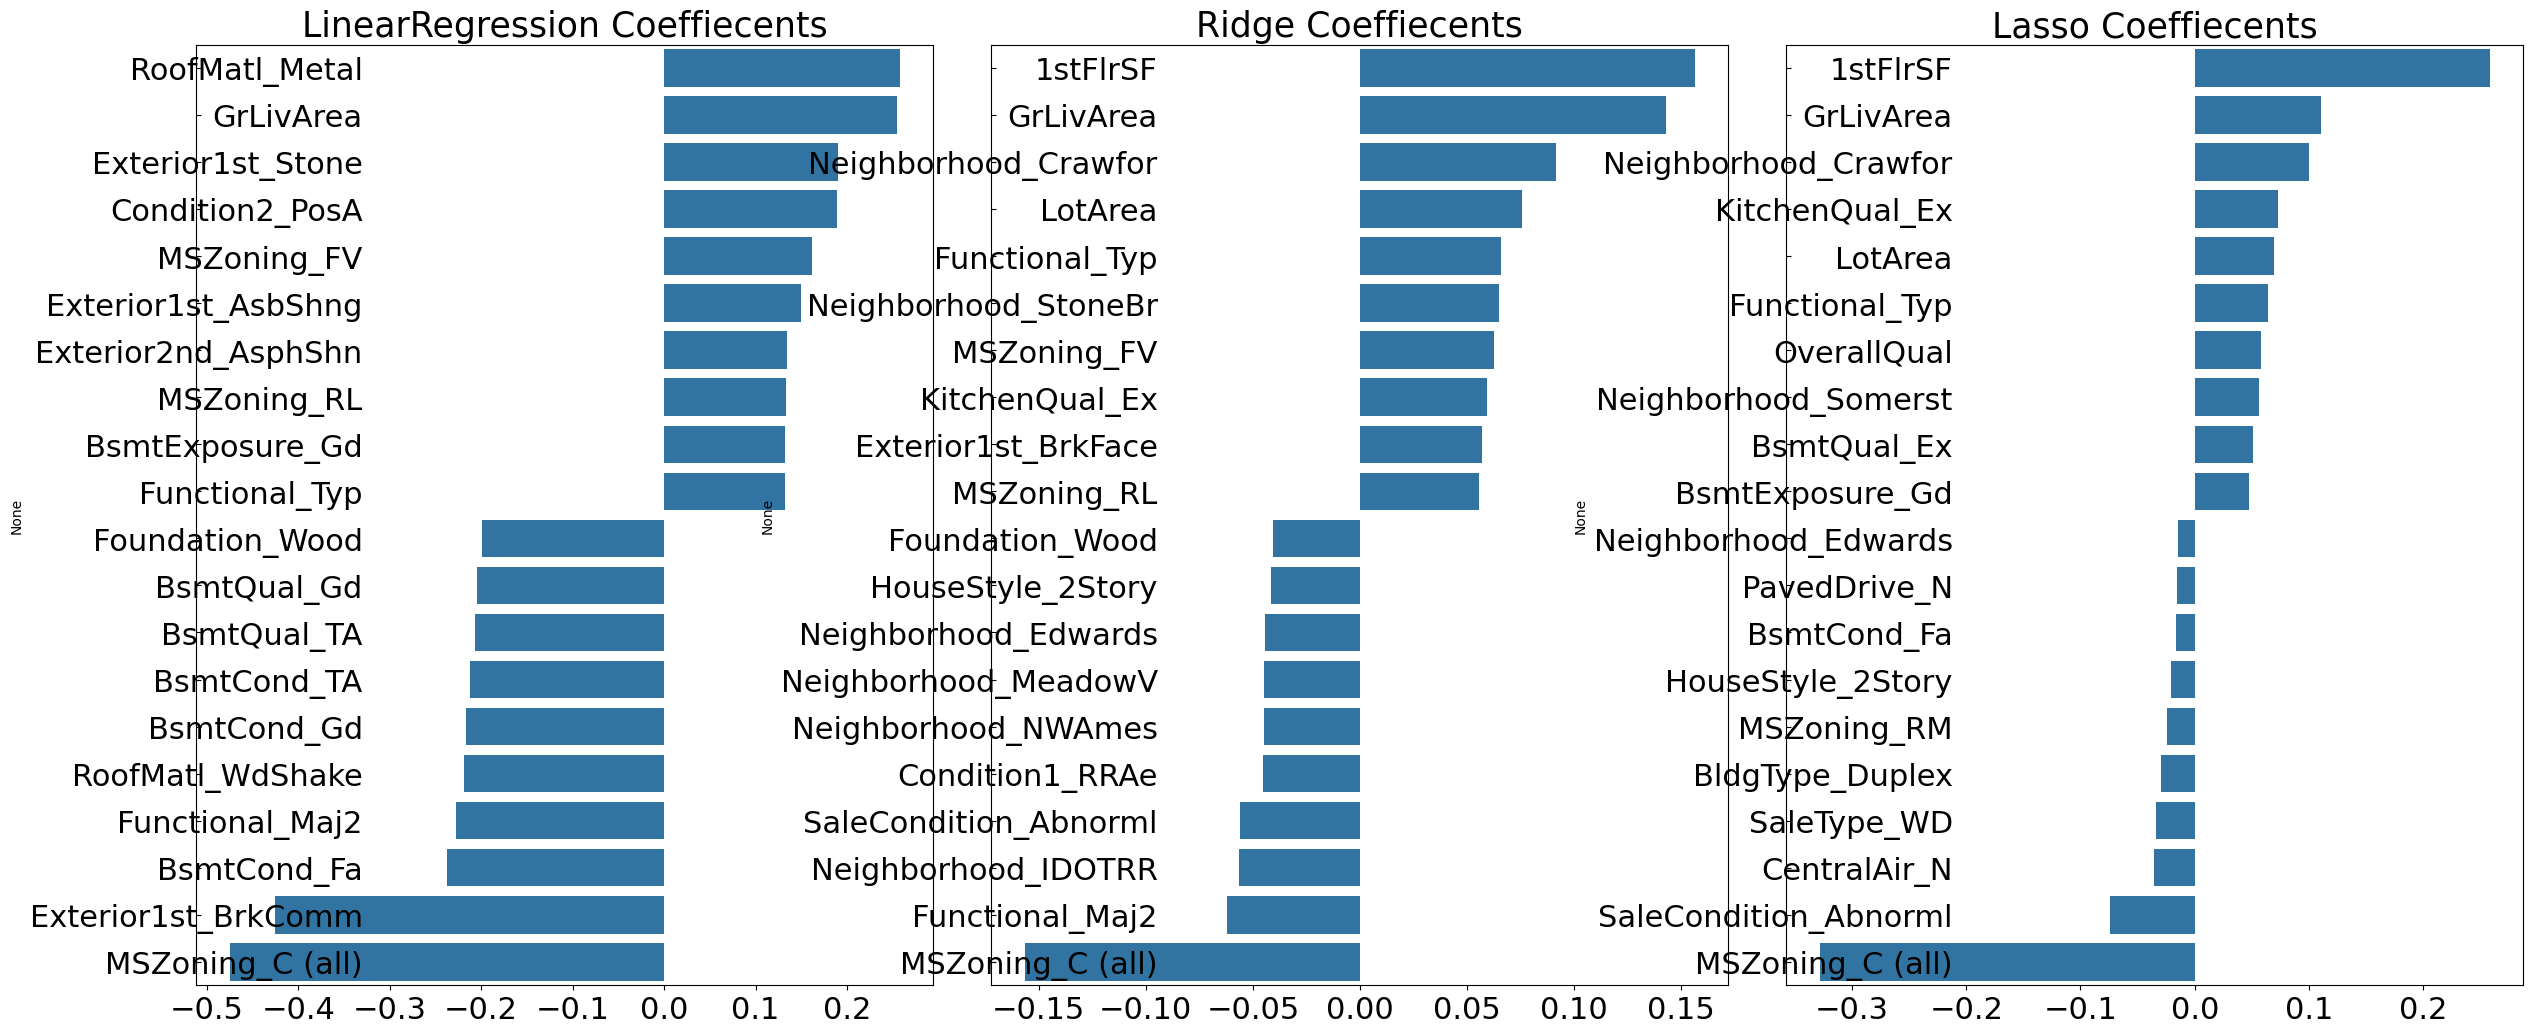

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

##### cf) 중간정리
- **<과정>**
- SalePrice 컬럼 로그변환
- 널값 처리
  - 널값 많은 컬럼:PoolQC, MiscFeature, Alley, Fence, FireplaceQu 삭제
  - 널값 안 많은 컬럼: 숫자형 데이터의 경우 평균값으로 대체
- 인코딩: 문자형 피처 '원-핫 인코딩' 진행
- **<결과>**
- LinearRegression 로그 변환 해제 RMSE: 21295.906 -> 선형회귀 RMSE
- Ridge 로그 변환 해제 RMSE: 22584.92 -> 릿지회귀 RMSE
- Lasso 로그 변환 해제 RMSE: 33922.99 -> 라쏘회귀 RMSE
---------------------------------------------------------------
- **<과정 추가>**
- 최적의 하이퍼파라미터 설정
  - 릿지회귀 alpha값: 12
  - 라쏘회귀 alpha값: 0.001
- **<결과>**
- LinearRegression 로그 변환 해제 RMSE: 21295.906 -> 선형회귀 RMSE
- Ridge 로그 변환 해제 RMSE: 23159.75 -> 릿지회귀 RMSE
- Lasso 로그 변환 해제 RMSE: 23121.426 -> 라쏘회귀 RMSE
---------------------------------------------------------------
- **<과정 추가>**
- 왜곡된 정도가 높은 피처를 로그변환
- 위 내용에 기반한 피처 데이터 세트, 학습/테스트 데이터 세트를 모두 다시 만든 후에 찾은 최적의 하이퍼파라미터 설정
  - 릿지회귀 alpha값: 8
  - 라쏘회귀 alpha값: 0.001
- **<결과>**
- LinearRegression 로그 변환 해제 RMSE: 20177.977 -> 선형회귀 RMSE
- Ridge 로그 변환 해제 RMSE: 21542.856 -> 릿지회귀 RMSE
- Lasso 로그 변환 해제 RMSE: 22157.381 -> 라쏘회귀 RMSE
---------------------------------------------------------------
- **<과정 추가>**
- 회귀계수가 높은 피처의 이상치 데이터 2개 삭제
- 위 내용에 기반한 피처 데이터 세트, 학습/테스트 데이터 세트를 모두 다시 만든 후에 찾은 최적의 하이퍼파라미터 설정
  - 릿지회귀 alpha값: 5
  - 라쏘회귀 alpha값: 0.001
- **<결과>**
- LinearRegression 로그 변환 해제 RMSE: 21295.11 -> 선형회귀 RMSE
- Ridge 로그 변환 해제 RMSE: 21189.92 -> 릿지회귀 RMSE
- Lasso 로그 변환 해제 RMSE: 20410.53 -> 라쏘회귀 RMSE

### 5) 모델 선택 및 비교하기

- 사용할 모델
  - XGBoost
  - Light GBM
  - GBM
  - 랜덤포레스트

#### 1) XGBoost 모델

In [ ]:
from xgboost import XGBRegressor

# XGBoost 하이퍼파라미터 설정
xgb_params = {'n_estimators':[1000],
              'max_depth': [3, 5, 7],
              'min_child_weight': [1, 3, 5]
              }

# XGBoost 모델 생성
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)

# 최적 하이퍼파라미터 찾기 (print_best_params는 기존 정의된 함수로 가정)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.118, 최적 alpha:{'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 1000}


#### 2) Light GBM 모델 (성능 굿!)

In [ ]:
from lightgbm import LGBMRegressor

# Light GBM 하이퍼파라미터 설정
lgbm_params = {'n_estimators':[1000],
               'max_depth': [3, 5, 7],
               'min_child_samples': [5, 10, 20]}

# Light GBM 모델 생성
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

# 최적 하이퍼파라미터 찾기 (print_best_params는 기존 정의된 함수로 가정)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2927
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 194
[LightGBM] [Info] Start training from score 12.020420
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2921
[LightGBM] [Info] Number of data points in the train set: 933, number of used features: 191
[LightGBM] [Info] Start training from score 12.025656
[LightGBM] [Warning] Found w

#### 3) GBM 모델 (성능 굿!)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# GBM 하이퍼파라미터 설정
gbm_params = {'n_estimators': [1000]}

# GBM 모델 생성
gbm_reg = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.6,
    max_features=0.4,
    alpha=0.9
)

# 최적 하이퍼파라미터 찾기 (print_best_params는 기존 정의된 함수로 가정)
best_gbm = print_best_params(gbm_reg, gbm_params)

GradientBoostingRegressor 5 CV 시 최적 평균 RMSE 값: 0.1171, 최적 alpha:{'n_estimators': 1000}


#### 4) 랜덤포레스트 모델 (성능 구림. 버리자)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# RandomForest 하이퍼파라미터 설정
rf_params = {'n_estimators': [1000]}

# RandomForest 모델 생성
rf_reg = RandomForestRegressor(
    n_estimators=1000,
    max_depth=None,             # 깊이 제한 없음 (필요 시 조정 가능)
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=0.4,
    n_jobs=-1,
    random_state=42
)

# 최적 하이퍼파라미터 찾기 (print_best_params는 기존 정의된 함수로 가정)
best_rf = print_best_params(rf_reg, rf_params)

RandomForestRegressor 5 CV 시 최적 평균 RMSE 값: 0.1352, 최적 alpha:{'n_estimators': 1000}


#### 5) 피처 시각화하기

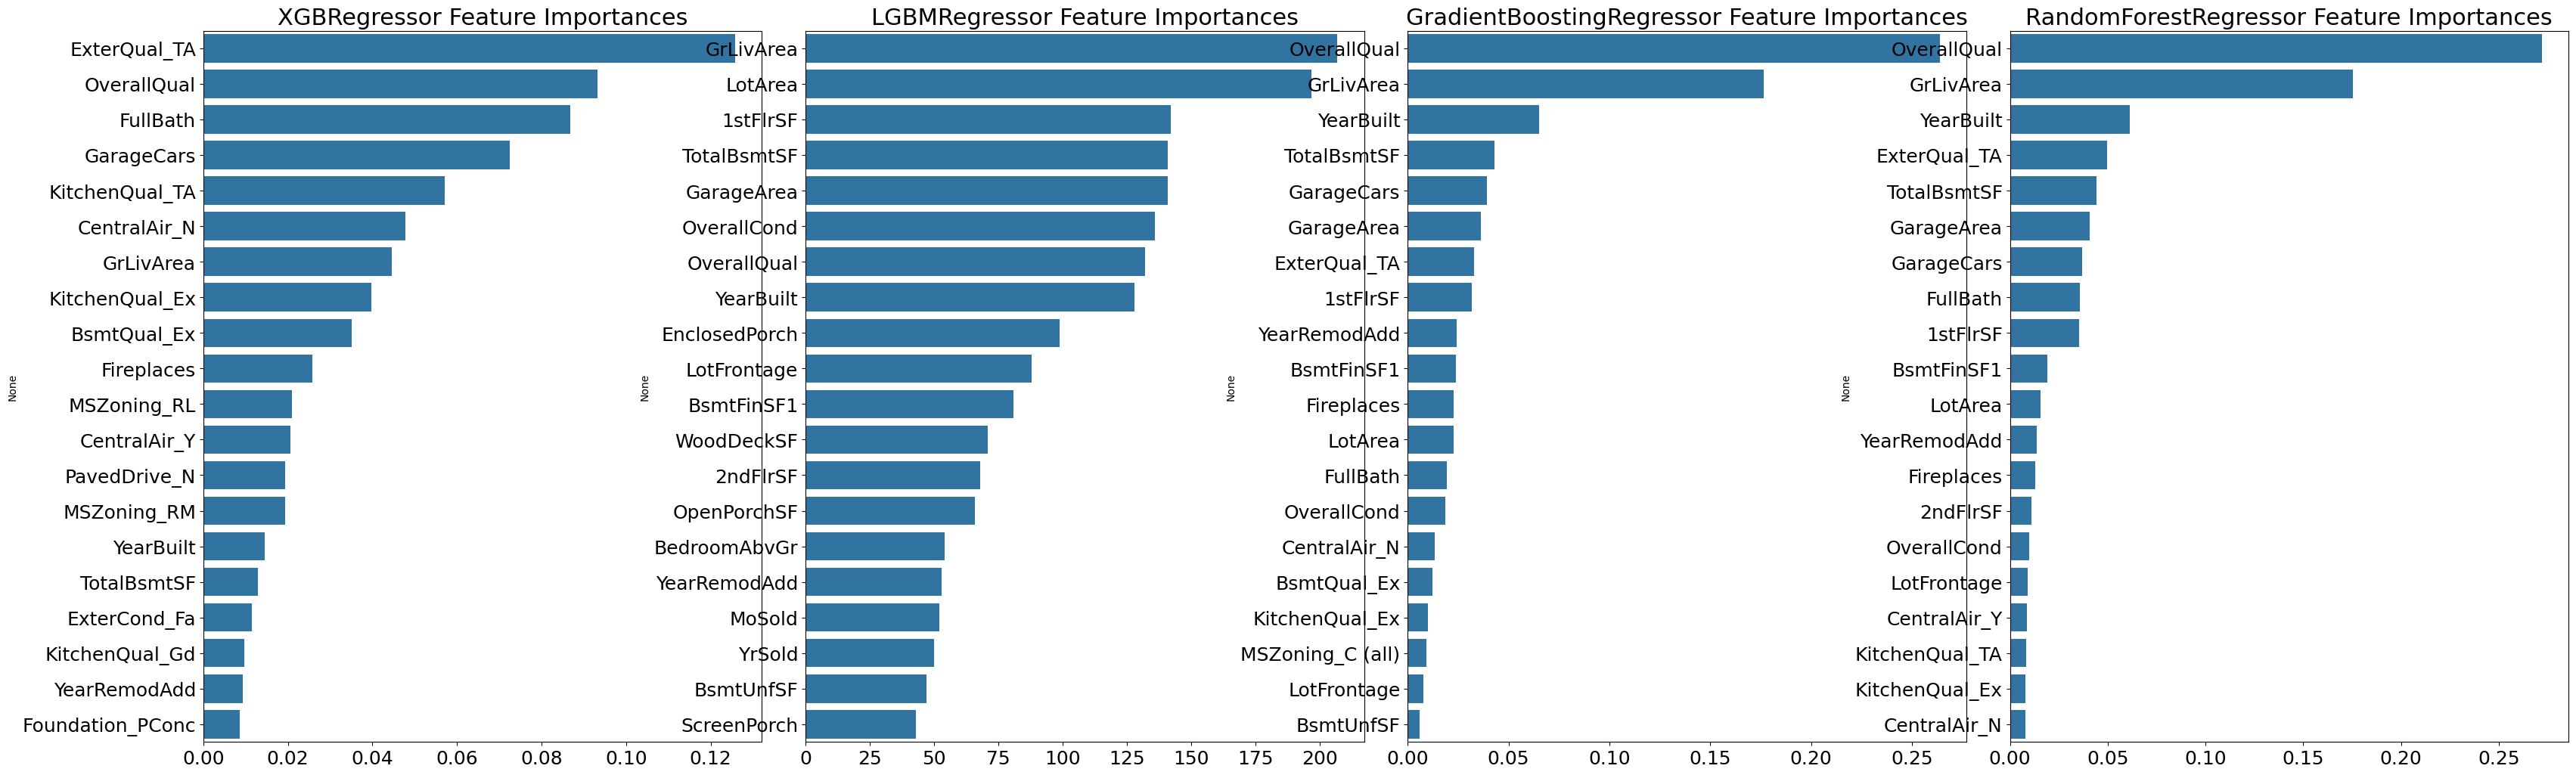

In [ ]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns)
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 4개 회귀 모델의 시각화를 위해 4개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(32, 10), nrows=1, ncols=4)
    fig.tight_layout()

    for i_num, model in enumerate(models):
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__ + ' Feature Importances', size=22)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(18)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index, ax=axs[i_num])

# 모델 리스트: 최적화된 모델 (GridSearchCV 또는 수동 튜닝 후)
models = [best_xgb, best_lgbm, best_gbm, best_rf]

visualize_ftr_importances(models)

##### cf) 모델별 정리
- **<과정 추가 - 마지막 기준>**
- 회귀계수가 높은 피처의 이상치 데이터 2개 삭제
- 위 내용에 기반한 피처 데이터 세트, 학습/테스트 데이터 - 세트를 모두 다시 만든 후에 찾은 최적의 하이퍼파라미터 설정
  - 릿지회귀 alpha값: 5
  - 라쏘회귀 alpha값: 0.001
- **<결과>**
- LinearRegression 로그 변환 해제 RMSE: 21295.11 -> 선형회귀 RMSE
  - LinearRegression 로그 변환된 RMSE: 0.121
- Ridge 로그 변환 해제 RMSE: 21189.92 -> 릿지회귀 RMSE
  - Ridge 로그 변환된 RMSE: 0.117
- Lasso 로그 변환 해제 RMSE: 20410.53 -> 라쏘회귀 RMSE
  - Lasso 로그 변환된 RMSE: 0.112
- XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.125, 최적 alpha:{'n_estimators': 1000}
- LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1203, 최적 alpha:{'n_estimators': 1000}
- GradientBoostingRegressor 5 CV 시 최적 평균 RMSE 값: 0.1165, 최적 alpha:{'n_estimators': 1000}
- RandomForestRegressor 5 CV 시 최적 평균 RMSE 값: 0.1359, 최적 alpha:{'n_estimators': 1000}

### cf) 혼합모델 만들어보기

In [ ]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.2 * ridge_pred + 0.8 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.11175052988441665
Ridge 모델의 RMSE: 0.11645559866184912
Lasso 모델의 RMSE: 0.11135123615795667


In [ ]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}

get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2824
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 143
[LightGBM] [Info] Start training from score 12.029584
최종 혼합 모델의 RMSE: 0.11388604015843438
XGBM 모델의 RMSE: 0.11627186912123354
LGBM 모델의 RMSE: 0.12019104823863959


### cf) 스태킹 앙상블 모델 만들어보기
- 릿지회귀, 라쏘회귀, XGBoost, GBM, Light GBM, 랜덤포레스트 모델 짬뽕

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출
        print('\t 폴드 세트: ', folder_counter, ' 시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n)

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [ ]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환.
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values


# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환.
ridge_reg = Ridge(alpha=5)
lasso_reg = Lasso(alpha=0.001)
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
gbm_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3,
                                     subsample=0.6, max_features=0.4)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
rf_reg = RandomForestRegressor(n_estimators=1000, max_features=0.4, n_jobs=-1, random_state=42)


# 각 모델의 스태킹용 학습 및 테스트 데이터 생성
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
gbm_train, gbm_test = get_stacking_base_datasets(gbm_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)
rf_train, rf_test = get_stacking_base_datasets(rf_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
Lasso  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
XGBRegressor  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
GradientBoostingRegressor  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
LGBMRegressor  model 시작
	 폴드 세트:  0  시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2578
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 135
[LightGBM] [Info] Start training from score 12.030249
	 폴드 세트:  1  시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_

In [ ]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.
Stack_final_X_train = np.concatenate((ridge_train, lasso_train,
                                      xgb_train, gbm_train, lgbm_train, rf_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test,
                                     xgb_test, gbm_test, lgbm_test, rf_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용.
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.10976387930470576


### 6) 제출용 test.csv 데이터 전처리하기
### train에 진행된 전처리
- NUll 많은 컬럼 삭제
- skew 컬럼 로그 변환
- 원핫 인코딩

결과값의 컬럼 개수가 266개여야한다

또 test와 train의 원핫인코딩 이후 개수가 달라지는 현상이 발생하게되는데

이때는 값이 너무 많아서
```
test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)
```
이런 방식으로 train과 열 개수를 맞춰주는 방식을 사용해봄
- 다른 방식을 사용해보셔도 좋습니다~

In [ ]:
X_train.shape

(932, 244)

In [ ]:
## test_data를 받아오기
test = pd.read_csv('/content/test.csv')


# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
test.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType'], axis=1 , inplace=True)

num_cols = test.select_dtypes(include=['number']).columns
test[num_cols] = test[num_cols].fillna(test[num_cols].mean())
test_ohe1 = pd.get_dummies(test)
test_ohe2 = test_ohe1.reindex(columns=X_train.columns, fill_value=0)


# 편향 전처리 진행
test_ohe2[skew_features_top.index] = np.log1p(test_ohe2[skew_features_top.index])
test_ohe2 = pd.get_dummies(test_ohe2)

test_ohe2.shape


(292, 244)

- 성능이 좋았던 모델 넣어보기

In [ ]:
## sample_data를 받아오기
sample = pd.read_csv('/content/sample_submission.csv')


# SalePrice 가 0으로 차있는 sample
sample

,Id,SalePrice
0,86,0
1,227,0
2,492,0
3,64,0
4,576,0
...,...,...
287,1271,0
288,903,0
289,1019,0
290,312,0


In [ ]:
pred = ridge_reg.predict(test_ohe2)
# 학습시 로그변환한 target을 썻으니 결과값을 다시 복원해야합니다
pred_exp = np.expm1(pred)


# sample 파일에 예측 값을 넣어주고
sample["SalePrice"] = pred_exp


# csv로 저장하기
sample.to_csv("./submission3.csv", index=False)

In [ ]:
# 제출부분과 크기가 맞는지 확인
pred_exp.shape

(292,)

In [ ]:
pred_exp

array([271763.07353699, 266454.72165416, 137521.58871223, 132594.97695397,
       117468.64979932, 309434.03068036, 240081.28502808,  90563.18480149,
       177115.89583618, 139821.32743261, 263323.50343777, 243174.14169879,
        74706.53699662,  80598.83356989, 125635.67979599, 135404.99212241,
       130574.52421889, 271431.33929823, 212951.32692438, 117998.29263039,
       269334.68869874, 150079.05881067, 131827.36359912, 200771.41174032,
       122671.20691508, 194185.74347377, 142875.74493237, 142790.53137897,
       369074.18745645, 193634.28691271, 191794.89660669, 184636.51562774,
       160986.98981511, 143216.48746645, 173778.74102993, 351916.55061207,
        99939.80662957, 211223.97419424, 233472.3124476 , 133934.00806013,
       311440.66533429, 206634.95585437, 118690.17755795, 308268.55665042,
       123595.93418729, 163427.92917089, 122135.83637018, 134186.38221367,
       205645.60446191, 166253.26062418, 208288.60162453, 141267.21682249,
       211824.49917949, 1

In [ ]:
# 스태킹을 위해 테스트 데이터도 변환 (넘파이 형태)
test_n = test_ohe2.values

# 기존 훈련에 사용한 기반 모델로 test 데이터 예측값 생성
ridge_test = get_stacking_base_datasets(ridge_reg, X_train.values, y_train.values, test_n, 5)[1]
lasso_test = get_stacking_base_datasets(lasso_reg, X_train.values, y_train.values, test_n, 5)[1]
xgb_test = get_stacking_base_datasets(xgb_reg, X_train.values, y_train.values, test_n, 5)[1]
gbm_test = get_stacking_base_datasets(gbm_reg, X_train.values, y_train.values, test_n, 5)[1]
lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train.values, y_train.values, test_n, 5)[1]
rf_test   = get_stacking_base_datasets(rf_reg, X_train.values, y_train.values, test_n, 5)[1]

# 모든 예측값을 이어붙여 최종 테스트 세트 구성
Stack_final_test = np.concatenate((ridge_test, lasso_test, xgb_test,
                                   gbm_test, lgbm_test, rf_test), axis=1)

# 최종 메타 모델로 예측 후 로그 복원
final_pred = meta_model_lasso.predict(Stack_final_test)
pred_exp = np.expm1(final_pred)


Ridge  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
Lasso  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
XGBRegressor  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
GradientBoostingRegressor  model 시작
	 폴드 세트:  0  시작
	 폴드 세트:  1  시작
	 폴드 세트:  2  시작
	 폴드 세트:  3  시작
	 폴드 세트:  4  시작
LGBMRegressor  model 시작
	 폴드 세트:  0  시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2578
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 135
[LightGBM] [Info] Start training from score 12.030249
	 폴드 세트:  1  시작
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_row_

In [ ]:
sample["SalePrice"] = pred_exp

# csv로 저장하기
sample.to_csv("./submission4.csv", index=False)

In [ ]:
pred_exp

array([269921.85681747, 265456.21385232, 145525.6909317 , 137319.62130984,
       114367.96350517, 306628.68437839, 237771.84773166,  85326.86792529,
       176477.77384157, 135990.14898113, 283291.9340444 , 238510.40111391,
        70383.38966541,  82073.94471073, 131144.23600353, 132381.18689401,
       125975.26992166, 283128.26560124, 216604.94540445, 115879.37468658,
       265208.35732212, 147455.3687297 , 137831.92859576, 209444.61050072,
       118584.81756479, 196294.46738116, 142392.68455929, 142971.8941771 ,
       365899.29397547, 190711.16257689, 192424.49246528, 185417.88004563,
       156474.52606132, 146596.4614535 , 174662.54784461, 356426.79441529,
       101663.01035238, 209057.81002195, 235943.0450405 , 135759.14012702,
       311059.93464647, 212619.11695344, 119724.50681475, 320157.93519592,
       125869.66377972, 163794.85594945, 121143.11880552, 132689.5276222 ,
       210775.06792337, 172190.38207407, 208822.35299364, 135716.03418289,
       217040.56499678, 1

## 평가기준 및 회고

### 데이터 이해 및 탐색
- Q: 각 피처에 대한 이해가 명확한가?
  - A: 약간 그렇다. 개별 피처들 간 관계는 자세히는 모르지만, 어느정도는 이해했다.
- Q: 데이터의 분포와 특성을 파악하기 위한 적절한 시각화가 이루어졌는가?
  - A: 그렇다. 특히, target값인 SalePrice값이 정규분포를 따르는지 보기 위해 그래프를 그려보았다.
- Q: 데이터에서 유의미한 인사이트를 도출했는가?
  - A: 유의미한 인사이트라고 하긴 그렇지만, 문자형 피처를 제외하고는 널값이 없으므로, 문자형 피처는 모두 원-핫 인코딩으로 변환해야 한다는 인사이트 등을 얻었다.
    - 아직, 피처간의 관계를 다각도로 보기에는, 피처들이 매우! 많기도 하고, 도메인 지식이 부족하다보니 어떻게 봐야할 지 잘 모르겠다..


### 데이터 전처리 과정
- Q: 결측치 처리, 이상치 처리 등 데이터 정제가 적절하게 수행되었는가?
  - A: 그렇다. 일단 할 수 있는 범위 내에서는 한 것같다. 다만, 널값 이 너무 많은 컬럼들과 불필요한 컬럼들을 삭제하긴 했지만, 주택 및 부동산에 일가견이 있는 사람이라면 더욱더 다양하게 처리했을 것 같다.
- Q: 데이터 스케일링 및 인코딩이 적절히 수행되었는가?
  - A: 그렇다. 코드에는 안넣었지만, 회귀모델 성능을 향상시키기 위해 Standard Scaler과 Robust Scaler를 사용했었다. 그치만, 결과가 안좋아서 다시 제외했다.
- Q: 피처 엔지니어링(파생변수)이 적절하고 창의적으로 이루어졌는가?
  - A: 파생변수는 별도로 만들지 않았다. 이 부분은 정말 감을 못잡겠다.. ㅠㅠ


### 모델 선택 및 비교
- Q: 최소 3개 이상의 모델을 비교하고 있는가?
  - A: 그렇다. XGBoost, GBM, Light GBM, 랜덤포레스트 이렇게 4개의 모델을 비교하였다. 대체적으로 GBM, Light GBM 모델의 성능이 좋았다.
- Q: 모델 선택 이유와 각 모델의 특성을 잘 설명하였는가?
  - A: XGBoost, GBM, Light GBM, 랜덤포레스트 이 4가지 모델을 선택한 이유는 다음과 같다.
  - 위 4가지 모델의 공통점: 비선형 관계를 잘 학습하고, 결측치나 스케일링에 덜 민감하기 때문이다. 또한, 특성 간 상호작용을 자동으로 학습하는 특징이 있다고 한다.
    - XGBoost: 정규화 + 병렬학습 + 결측치 처리 내장
    - Light GBM: XGBoost 모델의 경량화 버전 (그래서 저번 캐글 분류 대회(?) 때도, XGBoost 안썼고 Light GBM 사용했음), 높은 정확도 + 빠른 속도 + 다양한 파라미터 조정 가능 모델
    - GBM: 랜덤포레스트 모델보다 정확도는 높지만 느리다. 반복적으로 에러를 줄여가며 예측을 향상시켜주는 모델
    - 랜덤포레스트: 개인적으로 성능은 위 3가지보다 약간 안 좋은 것 같지만, 분류&회귀 문제에 무난하게 사용하기 좋은 모델인 것 같다.

### 성능 평가
- Q: 검정 데이터에 대한 평가 지표가 명확하게 제시되었는가?
  - A: 그렇다. RMSE를 사용하였다.
- Q: 평가 지표가 타당하며, 모델의 성능을 잘 반영하는가?
  - 그렇다. 대체적으로 모델의 성능을 잘 반영한다.
- Q: 하이퍼파라미터 튜닝(실험)을 진행하고, 결과를 기록했는가?
  - 그렇다. 위에 코드 중간중간에 텍스트로 기록했다.

### 회고
- 이번 회귀 문제에 관련된 프로젝트가 저번에 진행했던 분류 프로젝트보다 훨씬 어렵다고 느껴졌다.
- 그리고 개인적으로, 원래 데이터 분석을 진행하는 데에 있어서 EDA 과정과 데이터 전처리 과정을 중요하다고 생각하고 있었는데, 이번 회귀 프로젝트에서는 이러한 생각이 더 크게 와닿았다. 아무래도 분류는 특정 기준만 만족하면 어떤 클래스나 값으로 대부분 딱 떨어지는데, 회귀는 그야말로 도메인 지식 + 그에 맞는 EDA (다각도로 다 뜯어볼 수 있으니까) + 데이터 전처리 -> 훨씬 정확한 예측.. 우연으로 발생하는 과정이 없다고 생각한다.
- 이번주에 2개의 머신러닝 프로젝트를 진행하면서, 앞으로 어떤 부분에 집중해야 하는지 알았다^^